<a href="https://colab.research.google.com/github/rich-hyun/machine_learning_military/blob/main/%EC%9D%BC%EC%B0%A8%EB%B3%84/day6_1_guess_age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving project_proof2.xlsx to project_proof2 (32).xlsx
[23 24 22 25 26 21 20]
0.6326530612244898
0.5294117647058824
[20 21 22 23 24 25 26]
[20 20 21 22 23]
[[0.3333 0.     0.3333 0.3333 0.     0.     0.    ]
 [0.3333 0.3333 0.3333 0.     0.     0.     0.    ]
 [0.     0.3333 0.3333 0.3333 0.     0.     0.    ]
 [0.     0.     0.6667 0.3333 0.     0.     0.    ]
 [0.     0.     0.     0.6667 0.3333 0.     0.    ]]


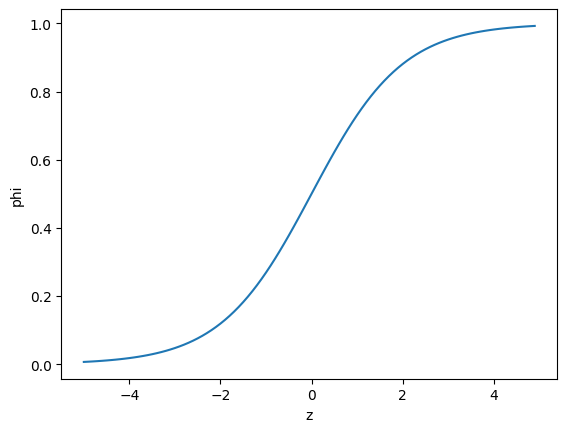

['A' 'C']
0.5714285714285714
0.5294117647058824
[22 22 22 22 22]
[[0.096 0.277 0.488 0.06  0.027 0.025 0.025]
 [0.139 0.292 0.446 0.051 0.023 0.024 0.024]
 [0.004 0.125 0.618 0.14  0.063 0.024 0.024]
 [0.001 0.081 0.614 0.18  0.08  0.022 0.022]
 [0.    0.029 0.547 0.273 0.12  0.015 0.015]]
[[ 0.24  1.3   1.87 -0.22 -1.02 -1.09 -1.09]
 [ 0.63  1.37  1.79 -0.38 -1.17 -1.12 -1.12]
 [-2.54  0.8   2.39  0.91  0.11 -0.84 -0.84]
 [-3.71  0.59  2.62  1.39  0.58 -0.73 -0.73]
 [-6.12  0.15  3.07  2.38  1.56 -0.52 -0.52]]
[[0.096 0.277 0.488 0.06  0.027 0.025 0.025]
 [0.139 0.292 0.446 0.051 0.023 0.024 0.024]
 [0.004 0.125 0.618 0.14  0.063 0.024 0.024]
 [0.001 0.081 0.614 0.18  0.08  0.022 0.022]
 [0.    0.029 0.547 0.273 0.12  0.015 0.015]]


In [34]:
from google.colab import files
uploaded=files.upload()

import pandas as pd
workbook=pd.read_excel('project_proof2.xlsx')
base=workbook.to_numpy()

import matplotlib.pyplot as plt
import numpy as np

"""넘파이로 데이터 준비하기"""
age=[]
for k in range(66):
  age.append(base[k][1])
rdays=[]
for k in range(66):
  rdays.append(base[k][3])

age2=np.array(age)
rdays2=np.array(rdays)

base_data=[[l,w] for l,w in zip(age,rdays)]
base_target=[1]*52+[0]*14

print(pd.unique(workbook['나이']))
base_input=workbook[['계급','나이','잔여일수']].to_numpy()

from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(
    age2,rdays,stratify=base_target,random_state=42)

train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

print(kn.classes_)
print(kn.predict(test_scaled[:5]))

import numpy as np
proba=kn.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=4))

import numpy as np
import matplotlib.pyplot as plt
z=np.arange(-5,5,0.1)
phi=1/(1+np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

char_arr=np.array(['A','B','C','D','E'])
print(char_arr[[True,False,True,False,False]])

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

print(lr.predict(test_scaled[:5]))

proba=lr.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=3))

decision=lr.decision_function(test_scaled[:5])
print(np.round(decision,decimals=2))
from scipy.special import expit
from scipy.special import softmax
proba=softmax(decision,axis=1)
print(np.round(proba,decimals=3))